<a href="https://colab.research.google.com/github/piercepatrick/Titans_2019_FF_Analysis/blob/master/Tannehilll_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Statistical Analysis of Ryan Tannehill's 2019 Fantasy Football Season using Python** 

![alt text](https://static.clubs.nfl.com/image/private/t_editorial_landscape_8_desktop_mobile/f_auto/titans/uri6fr8vhrjsusquizlt.jpg)




After being traded for a fourth round pick from the Miami Dolphins to the Tennessee Titans in the midst of 2019 free agency, Ryan Tannehill joined a Titans team in the backup role to 5th year Marcus Mariota. After starting the season a mere 2-4, it was Tannehill's opportunity to jumpstart a struggling Tennessee offense with a first year offensive coordinator. Over the remaining 10 games, Tannehill led the Titans to a 7-3 record with key wins over the Kansas City Chiefs and Houston Texans, leading them back to NFL Playoffs. The Tannehill led Titans finished within the top 10 scoring offenses in the league, and Tannehill led the league in both yards per attempt and qb rating while also finishing third best in completion percentage. 

  During the Titan's playoff push, more than Titan's fans began to take notice of Tannehill. The 31 year old small market quarterback began to catch the eyes of many Fantasy Football team owners, as well. According to Tristan Crockett of ESPN, "Quarterback Ryan Tannehill and wide receiver A.J. Brown of the Tennessee Titans found themselves on a finalist's roster in 27.9% and 33.7% of ESPN leagues, the duo ranking among the five players who have seen the greatest such increase compared with their percentages of playoff qualifiers. Tannehill was on only 10.0% and Brown 9.8% of playoff teams, underscoring how important they have been on the add/drop front." 

Crockett writes, "Tannehill and Brown's 51.7 fantasy points in Weeks 14-15 combined were fourth-most among quarterbacks, and Brown's 59.0 PPR fantasy points were second-most behind only Thomas'." The emergence of Ryan Tannehill proved to be one of the defining moves in Fantasy leagues as both Tannehill's and AJ Browns average draft position was undrafted. Whichever owner decided he was at least worth a bench spot, was likely gearing up for their championship in week 16(like me). In a season where several QB's saw significant injuries (Ben Roelthisberger, Cam Newton, etc.) acquiring Tannehill off your league's waiver wire may have proved one of the best decisions of your season. As the Fantasy Footballers always say, leagues are won on the waiver wire, not at the draft. 

Tannehill's 2019 performance earned him a trip to his first pro bowl, AP/PFWA Comeback Player of the Year, two playoff wins, and a four-year extension worth 118 million including 62 million in fully guaranteed money and 91 million in total guarantees. However, this analysis serves to investigate how goood Tannehill really was, how he elevated the team, and if this production is sustainable.

![alt text](https://www.wkrn.com/wp-content/uploads/sites/73/2019/12/IMG_8476.jpg?w=800)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
WEEKLY_BASE_URL = '/content/drive/My Drive/DS/Titans FF Analysis/data_v2/weekly/2019/week{}.csv'
YEARLY_BASE_URL = '/content/drive/My Drive/DS/Titans FF Analysis/data_v2/yearly/2019.csv'

In [ ]:
def generate_df():
  df = pd.DataFrame()
  for week in range(1, 18):
    weekly_df = pd.read_csv(WEEKLY_BASE_URL.format(week))
    weekly_df['Week'] = week
    df = pd.concat([df, weekly_df])
  return df

df = generate_df()
year_df = pd.read_csv(YEARLY_BASE_URL)


In [ ]:
df.head()

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40,1
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10,1
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32,1
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32,1


In [ ]:
year_df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,Att.1,Yds.1,Tgt,Rec,Yds.2,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,287.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,303.0,1540.0,24.0,18.0,206.0,11.44,5.0,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,236.0,1084.0,68.0,49.0,474.0,9.67,3.0,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,301.0,1357.0,71.0,54.0,420.0,7.78,3.0,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [ ]:
df.rename({'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

In [ ]:
year_df.rename({'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

In [ ]:
df['TotalTD'] = df['PassingTD'] + df['RushingTD'] + df['ReceivingTD']
year_df['TotalTD'] = year_df['PassingTD'] + year_df['RushingTD'] + year_df['ReceivingTD']

In [ ]:
year_df['FantasyPoints'] = year_df['FantasyPoints'] - year_df['Rec'] 
year_df['FantasyPoints'] = year_df['FantasyPoints'] + year_df['Rec']*0.5
year_df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingAtt,PassingYDs,Int,RushingAtt,RushingYDs,Tgt,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,TotalTD
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,287.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,411.20,19.0
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,43.0
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,303.0,1540.0,24.0,18.0,206.0,11.44,5.0,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,285.60,18.0
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,236.0,1084.0,68.0,49.0,474.0,9.67,3.0,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,290.30,19.0
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,301.0,1357.0,71.0,54.0,420.0,7.78,3.0,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,284.70,14.0


In [ ]:
df = df.drop(['PPRFantasyPoints', 'StandardFantasyPoints'], axis = 1)

In [ ]:
df.rename(columns = {'HalfPPRFantasyPoints': 'FantasyPoints'}, inplace = True)

In [ ]:
df['Usage'] = df['Tgt'] + df['RushingAtt']
df.head()

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,FantasyPoints,Week,TotalTD,Usage
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,1,5.0,3.0
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,1,4.0,4.0
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,1,1.0,4.0
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,1,3.0,1.0
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,1,2.0,6.0


In [ ]:
year_df.drop(['PassingYds', 'RushingYds', 'ReceivingYds'], axis =1, inplace = True)

In [ ]:
year_df = year_df.loc[:, ~year_df.columns.duplicated()].copy()
year_df['Usage'] = year_df['Tgt'] + year_df['RushingAtt']

In [ ]:
year_df['UsageRank'] = year_df['Usage'].rank(ascending = False)
year_df['FantasyPointsRank'] = year_df['FantasyPoints'].rank(ascending = False)
year_df['FantasyPoints/GM'] = year_df['FantasyPoints'] / year_df['G']
year_df['FantasyPoints/GM_Rank'] = year_df['FantasyPoints'].rank(ascending = False)
year_df['FantasyPoints/GM'] = year_df['FantasyPoints/GM'].apply(lambda x: round(x,2))
year_df.sort_values(by='FantasyPoints/GM_Rank').head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingAtt,PassingYDs,Int,RushingAtt,RushingYDs,Tgt,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingTD,RushingTD,ReceivingTD,FantasyPoints,TotalTD,Usage,UsageRank,FantasyPointsRank,FantasyPoints/GM,FantasyPoints/GM_Rank
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,36.0,7.0,0.0,415.68,43.0,176.0,34.0,1.0,27.71,1.0
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,287.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,15.0,4.0,411.20,19.0,429.0,1.0,2.0,25.70,2.0
11,11,Dak Prescott,DAL,QB,26.0,16.0,16.0,388.0,596.0,4902.0,11.0,52.0,277.0,0.0,0.0,0.0,0.00,6.0,2.0,30.0,3.0,0.0,335.78,33.0,52.0,193.5,3.0,20.99,3.0
13,13,Russell Wilson,SEA,QB,31.0,16.0,16.0,341.0,516.0,4110.0,5.0,75.0,342.0,0.0,0.0,0.0,0.00,8.0,2.0,31.0,3.0,0.0,326.60,34.0,75.0,139.5,4.0,20.41,4.0
16,16,Deshaun Watson,HOU,QB,24.0,15.0,15.0,333.0,495.0,3852.0,12.0,82.0,413.0,1.0,1.0,6.0,6.00,10.0,3.0,26.0,7.0,1.0,318.48,34.0,83.0,127.0,5.0,21.23,5.0


In [ ]:
qb_df = year_df.loc[year_df['Pos'] == 'QB'].copy()
qb_df

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingAtt,PassingYDs,Int,RushingAtt,RushingYDs,Tgt,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingTD,RushingTD,ReceivingTD,FantasyPoints,TotalTD,Usage,UsageRank,FantasyPointsRank,FantasyPoints/GM,FantasyPoints/GM_Rank
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.0,9.0,2.0,36.0,7.0,0.0,415.68,43.0,176.0,34.0,1.0,27.71,1.0
11,11,Dak Prescott,DAL,QB,26.0,16.0,16.0,388.0,596.0,4902.0,11.0,52.0,277.0,0.0,0.0,0.0,0.0,6.0,2.0,30.0,3.0,0.0,335.78,33.0,52.0,193.5,3.0,20.99,3.0
13,13,Russell Wilson,SEA,QB,31.0,16.0,16.0,341.0,516.0,4110.0,5.0,75.0,342.0,0.0,0.0,0.0,0.0,8.0,2.0,31.0,3.0,0.0,326.60,34.0,75.0,139.5,4.0,20.41,4.0
16,16,Deshaun Watson,HOU,QB,24.0,15.0,15.0,333.0,495.0,3852.0,12.0,82.0,413.0,1.0,1.0,6.0,6.0,10.0,3.0,26.0,7.0,1.0,318.48,34.0,83.0,127.0,5.0,21.23,5.0
29,29,Jameis Winston,TAM,QB,25.0,16.0,16.0,380.0,626.0,5109.0,30.0,59.0,250.0,0.0,0.0,0.0,0.0,12.0,5.0,33.0,1.0,0.0,297.36,34.0,59.0,172.0,7.0,18.59,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,Trevor Siemian,NYJ,QB,28.0,1.0,1.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.0,0.0,592.0,546.0,0.12,546.0
600,600,Alex Tanney,NYG,QB,32.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,592.0,548.0,0.04,548.0
611,611,Blake Bortles,LAR,QB,27.0,3.0,0.0,1.0,2.0,3.0,0.0,2.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.78,0.0,2.0,529.0,612.0,-0.26,612.0
612,612,Sean Mannion,MIN,QB,27.0,3.0,1.0,12.0,21.0,126.0,2.0,6.0,-5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.46,0.0,6.0,449.0,614.0,-0.49,614.0


In [ ]:
qb_df.drop(['Rec', 'Tgt', 'ReceivingYDs', 'ReceivingTD', 'Y/R'], axis=1,inplace = True)

In [ ]:
qb_df['Y/A'] = qb_df['PassingYDs'] / qb_df['PassingAtt']

In [ ]:
qb_df_week = df.loc[df['Pos'] == 'QB'].copy()
qb_df_week.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1,inplace = True)
qb_df_week['Y/A'] = qb_df_week['PassingYds'] / qb_df_week['PassingAtt']
qb_df_week.head()

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,FL,FantasyPoints,Week,TotalTD,Usage,Y/A
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,33.56,1,5.0,3.0,16.200000
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,33.40,1,4.0,4.0,12.656250
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,7.10,1,1.0,4.0,9.166667
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,27.32,1,3.0,1.0,11.454545
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,14.32,1,2.0,6.0,9.800000


# **How did Ryan Tannehill compare to other top Quarterbacks?**

![Mahomes](https://www.puntsports.com.au/wp-content/uploads/2020/01/13932941-1.jpg)

In [136]:
top_qbs = pd.read_csv('/content/drive/My Drive/DS/Titans FF Analysis/QBs - Sheet1 - QBs - Sheet1 (1).csv')
top_qbs.set_index('Week', drop = True, inplace = True)
top_qbs.head()

,Tannehill,Mahomes,Wilson,Jackson
Week,,,,
1,NaN,27.32,16.60,33.56
2,NaN,31.62,24.20,30.88
3,NaN,27.86,41.34,21.28
4,NaN,18.00,14.30,24.48
5,NaN,18.54,29.92,11.44


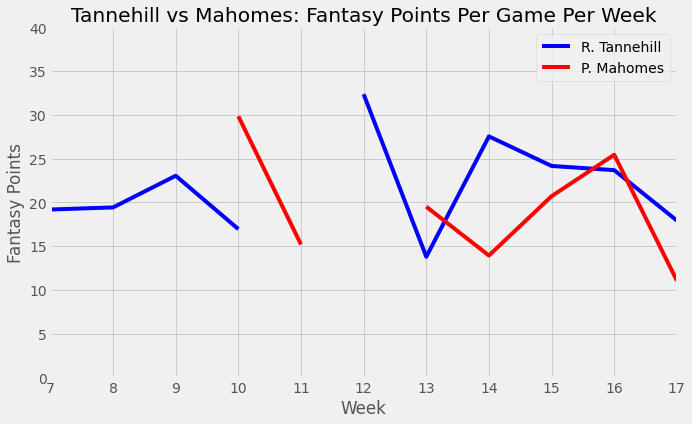

In [134]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
tannehill, = plt.plot(top_qbs.Tannehill, color = 'blue')
mahomes, = plt.plot(top_qbs.Mahomes, color = 'red') 
plt.title('Tannehill vs Mahomes: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.yticks([0,5,10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, mahomes], ['R. Tannehill', 'P. Mahomes'])
plt.style.use('fivethirtyeight')

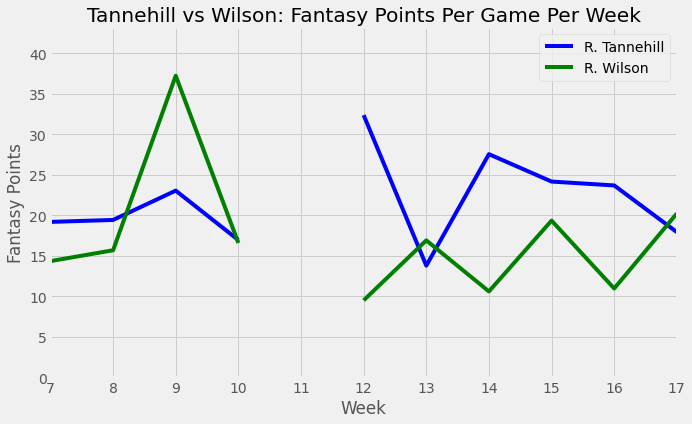

In [133]:
rcParams['figure.figsize'] = 10, 6
tannehill, = plt.plot(top_qbs.Tannehill, color = 'blue') 
wilson, = plt.plot(top_qbs.Wilson, color = 'green')
plt.title('Tannehill vs Wilson: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.yticks([0,5,10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, wilson], ['R. Tannehill', 'R. Wilson'])
plt.style.use('fivethirtyeight')

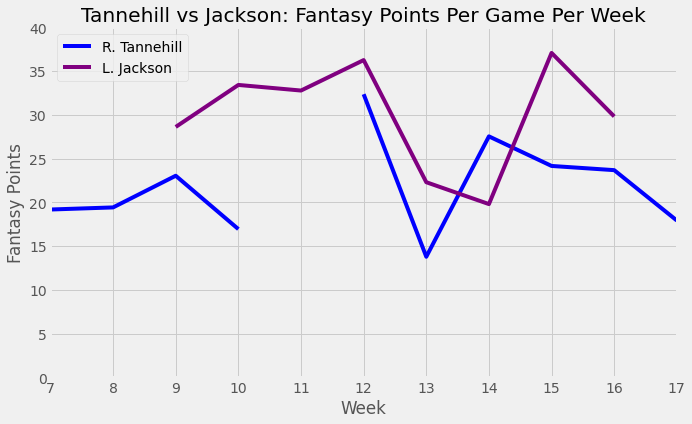

In [135]:
rcParams['figure.figsize'] = 10, 6
tannehill, = plt.plot(top_qbs.Tannehill, color = 'blue') 
jackson, = plt.plot(top_qbs.Jackson, color = 'Purple')
plt.title('Tannehill vs Jackson: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.yticks([0,5,10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, jackson], ['R. Tannehill', 'L. Jackson'])
plt.style.use('fivethirtyeight')

 "Tannehill's 178.4 fantasy points since taking over as the Titans' starting quarterback in Week 7 rank third-best at the position and fifth-best overall." and,

In [ ]:
2. How much did the Marcus Mariota -> Ryan Tannehill switch in Week 7 affect the offense's Fantasy Footabll performance?

3. Did Ryan Tannehill over-perform in the 2019-2020 season and is he due for a regression in the 2020-2021 season?

Object `performance` not found.
Object `season` not found.
